<a href="https://colab.research.google.com/github/sharonchristabel/Evolutionary-computing/blob/main/tsp_perfect.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import random
import time
from datetime import datetime
A = ( [ 0, 8, 2, 3, 7, 2, 5 ],
      [ 8, 0, 3, 5, 1, 8, 2 ],
      [ 2, 3, 0, 2, 2, 6, 8 ],
      [ 3, 5, 2, 0, 6, 2, 2 ],
      [ 7, 1, 2, 6, 0, 3, 5 ],
      [ 2, 8, 6, 2, 3, 0, 1 ],
      [ 5, 2, 8, 2, 5, 1, 0 ])

In [ ]:
def random_n_parents(n):
  from numpy.random import default_rng
  rng = default_rng()
  for i in range(n):
    df.loc[i] = rng.choice(7, size=7, replace=False)
  return(df)

In [ ]:
def mutation(C):
  x1=random.randint(0,5)
  x2=random.randint(0,5)
  y=np.random.rand()
  if(y<0.5):
    C[x1],C[x2]=C[x2],C[x1]
  return C  


In [ ]:
def crossover(P1,P2):
    k1 = random.randint(1,5)
    k2 = random.randint(k1,6)
    
    k = k2-k1
    C1 = []*k
    C2 = []*k
    j = k + 1
    C1 = P1[k1:k2]
    C2 = P2[k1:k2]
    
    
    for i in range(7):
        z = 1
        for j in range(k):
            if(P2[i]==C1[j]):
                z = 0
                break
        if(z):
            C1 = np.append(C1,P2[i])  
    for i in range(7):
        z = 1
        for j in range(k):
            if(P1[i]==C2[j]):
                z = 0
                break
        if(z):
            C2 = np.append(C2,P1[i])  
    C1 = mutation(C1) 
    C2 = mutation(C2)
    
    return(C1,C2)

In [ ]:
def fitness(X):
  distance=0
  distance=A[int(X[0])][int(X[1])] + A[int(X[1])][int(X[2])] + A[int(X[2])][int(X[3])] + A[int(X[3])][int(X[4])] + A[int(X[4])][int(X[5])] + A[int(X[5])][int(X[6])] + A[int(X[6])][int(X[0])]
  return(distance)

In [ ]:
fitness_count= []
generation_count=[]

In [ ]:
count_fitness = 0
count_generation = 0
time_taken = 0
data = {'1st': [],
        '2nd': [],
        '3rd': [],
        '4th': [],
        '5th': [],
        '6th': [],
        '7th': [],}
df=pd.DataFrame(data)
random_n_parents(10)
print("\n Random 10 initial parents are: \n",df)
n=len(df)-1
for i in range(n):
  c1,c2=crossover(df.loc[i],df.loc[i+1])
  df.loc[len(df)]=c1
  df.loc[len(df)]=c2
distance=[]
for i in range(len(df)):
  distance=np.append(distance,fitness(df.loc[i]))
  count_fitness=count_fitness+1
df['Fitness']=distance
df=df.sort_values(by=['Fitness'],ascending=True)
df=df.drop_duplicates()
df=df.head(10)
df=df.reset_index()
df=df.drop(['index'],axis=1)
count_generation=count_generation+1
print("\n Best fit 5 of Generation {0} are:".format(int(count_generation)))  
print(df.head())
while(int(df.loc[0].Fitness)>13):
  count_generation=count_generation+1
  n=len(df)-1
  for i in range(n):
    c1,c2=crossover(df.iloc[i],df.iloc[i+1])
    c1=np.append(c1,fitness(c1))
    count_fitness=count_fitness+1
    df.loc[len(df)] = c1
    c2=np.append(c2,fitness(c2))
    count_fitness=count_fitness+1
    df.loc[len(df)] = c2
  df = df.sort_values(by=['Fitness'], ascending=True)
  df = df.drop_duplicates()
  print(" \n Best fit 5 of Generation {0} are:\n".format(int(count_generation)))   
  df = df.head(10)
  df = df.reset_index()
  df = df.drop(['index'], axis=1)
  print(df.head())      
print("Fitness checked {0} times".format(int(count_fitness)))
print("Number of generations created {0} times".format(int(count_generation)))
fitness_count = np.append(fitness_count,count_fitness)
generation_count = np.append(generation_count,count_generation)


 Random 10 initial parents are: 
    1st  2nd  3rd  4th  5th  6th  7th
0  4.0  5.0  0.0  6.0  1.0  2.0  3.0
1  6.0  0.0  3.0  2.0  4.0  5.0  1.0
2  1.0  6.0  3.0  2.0  5.0  4.0  0.0
3  6.0  3.0  2.0  5.0  4.0  0.0  1.0
4  0.0  1.0  3.0  5.0  6.0  2.0  4.0
5  6.0  4.0  5.0  1.0  0.0  2.0  3.0
6  5.0  1.0  2.0  6.0  4.0  3.0  0.0
7  5.0  2.0  0.0  4.0  1.0  3.0  6.0
8  4.0  5.0  3.0  6.0  0.0  1.0  2.0
9  1.0  3.0  0.0  6.0  5.0  2.0  4.0

 Best fit 5 of Generation 1 are:
   1st  2nd  3rd  4th  5th  6th  7th  Fitness
0  2.0  1.0  6.0  3.0  4.0  5.0  0.0     20.0
1  6.0  1.0  0.0  3.0  2.0  4.0  5.0     21.0
2  4.0  5.0  0.0  6.0  1.0  2.0  3.0     23.0
3  1.0  3.0  0.0  6.0  5.0  2.0  4.0     23.0
4  3.0  6.0  0.0  5.0  2.0  4.0  1.0     23.0
 
 Best fit 5 of Generation 2 are:

   1st  2nd  3rd  4th  5th  6th  7th  Fitness
0  2.0  1.0  6.0  3.0  4.0  5.0  0.0     20.0
1  3.0  2.0  4.0  5.0  0.0  6.0  1.0     21.0
2  6.0  1.0  0.0  3.0  2.0  4.0  5.0     21.0
3  6.0  1.0  2.0  3.0  0.0  

In [ ]:
count=0
while(count<20):
  count_fitness=0
  count_generation=0
  time_taken=0
  data = {'1st': [],
        '2nd': [],
        '3rd': [],
        '4th': [],
        '5th': [],
        '6th': [],
        '7th': [],}
  df=pd.DataFrame(data)
  random_n_parents(10)
  print("\n Random 10 initial parents are: \n",df)
  n=len(df)-1
  for i in range(n):
      c1,c2=crossover(df.loc[i],df.loc[i+1])
      df.loc[len(df)]=c1
      df.loc[len(df)]=c2
  distance=[]
  for i in range(len(df)):
      distance=np.append(distance,fitness(df.loc[i]))
      count_fitness=count_fitness+1
  df['Fitness']=distance
  df=df.sort_values(by=['Fitness'],ascending=True)
  df=df.drop_duplicates()
  df=df.head(10)
  df=df.reset_index()
  df=df.drop(['index'],axis=1)
  count_generation=count_generation+1
  print("\n Best fit 5 of Generation {0} are:".format(int(count_generation)))  
  print(df.head())
  while(int(df.loc[0].Fitness)>13):
      count_generation=count_generation+1
      n=len(df)-1
      for i in range(n):
            c1,c2=crossover(df.loc[i],df.loc[i+1])
            c1=np.append(c1,fitness(c1))
            count_fitness=count_fitness+1
            df.loc[len(df)] = c1
            c2=np.append(c2,fitness(c2))
            count_fitness=count_fitness+1
            df.loc[len(df)] = c2
      df = df.sort_values(by=['Fitness'], ascending=True)
      df = df.drop_duplicates()
      print(" \n Best fit 5 of Generation {0} are:\n".format(int(count_generation))) 
      df = df.head(10)
      df = df.reset_index()
      df = df.drop(['index'], axis=1)
      print(df.head())
  print("Fitness checked {0} times".format(int(count_fitness)))
  print("Number of generations created {0} times".format(int(count_generation)))
  count = count+1
  fitness_count = np.append(fitness_count,count_fitness)
  generation_count = np.append(generation_count,count_generation)


 Random 10 initial parents are: 
    1st  2nd  3rd  4th  5th  6th  7th
0  4.0  5.0  3.0  2.0  0.0  6.0  1.0
1  1.0  6.0  0.0  5.0  3.0  4.0  2.0
2  2.0  1.0  0.0  5.0  3.0  4.0  6.0
3  3.0  4.0  2.0  5.0  1.0  0.0  6.0
4  5.0  0.0  4.0  6.0  2.0  3.0  1.0
5  5.0  4.0  6.0  3.0  1.0  0.0  2.0
6  4.0  2.0  5.0  0.0  1.0  3.0  6.0
7  6.0  2.0  1.0  5.0  3.0  4.0  0.0
8  0.0  1.0  5.0  4.0  3.0  2.0  6.0
9  6.0  4.0  0.0  2.0  1.0  5.0  3.0

 Best fit 5 of Generation 1 are:
   1st  2nd  3rd  4th  5th  6th  7th  Fitness
0  4.0  5.0  3.0  2.0  0.0  6.0  1.0     17.0
1  1.0  4.0  2.0  5.0  0.0  3.0  6.0     18.0
2  1.0  6.0  0.0  5.0  3.0  4.0  2.0     22.0
3  1.0  3.0  2.0  5.0  6.0  0.0  4.0     27.0
4  1.0  0.0  6.0  5.0  3.0  4.0  2.0     27.0
 
 Best fit 5 of Generation 2 are:

   1st  2nd  3rd  4th  5th  6th  7th  Fitness
0  4.0  5.0  3.0  2.0  0.0  6.0  1.0     17.0
1  1.0  4.0  2.0  5.0  0.0  3.0  6.0     18.0
2  3.0  1.0  6.0  0.0  5.0  4.0  2.0     21.0
3  1.0  3.0  6.0  0.0  5.0  

In [ ]:
fitness_count

array([118., 100.,  28.,  46., 100.,  82.,  28.,  64., 226.,  28., 100.,
        82.,  64.,  64., 100.,  82.,  28., 244.,  64.,  82., 136.])

In [ ]:
np.mean(fitness_count)

88.85714285714286

In [ ]:
generation_count

array([ 6.,  5.,  1.,  2.,  5.,  4.,  1.,  3., 12.,  1.,  5.,  4.,  3.,
        3.,  5.,  4.,  1., 13.,  3.,  4.,  7.])

In [ ]:
np.mean(generation_count)

4.380952380952381

<function matplotlib.pyplot.show(*args, **kw)>

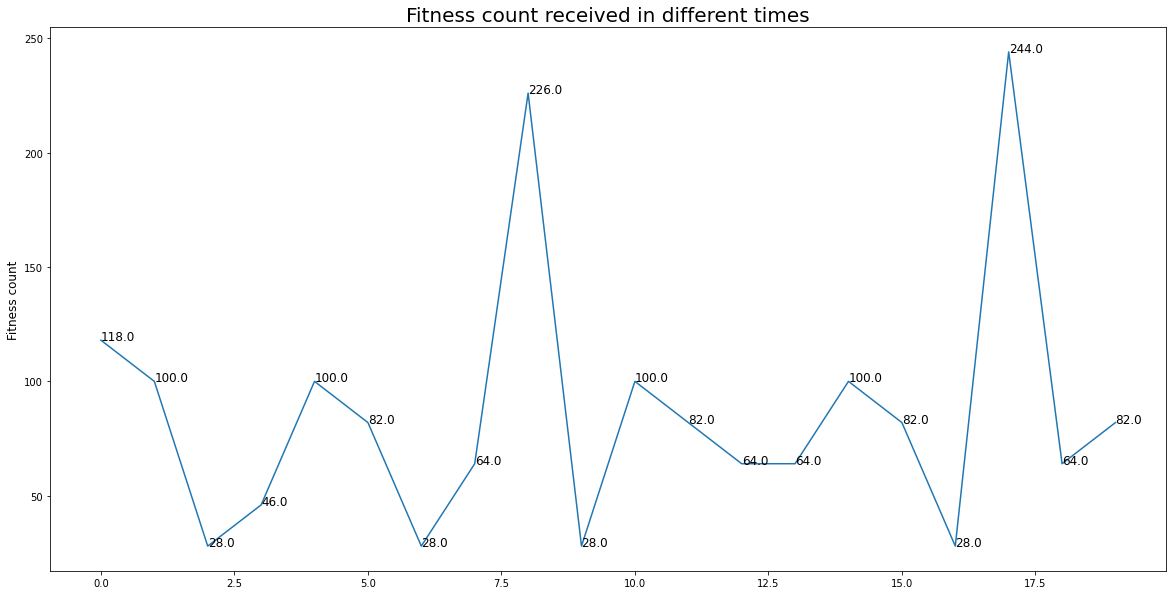

In [ ]:
import matplotlib.pyplot as plt
fig, ax = plt.subplots(figsize=(20,10))
x=np.arange(20)
plt.title("Fitness count received in different times", size=20)
plt.ylabel("Fitness count", size=12)
y=fitness_count[x]
plt.plot(x, y)
for index in range(len(x)):
  ax.text(x[index], y[index], y[index], size=12)
plt.show

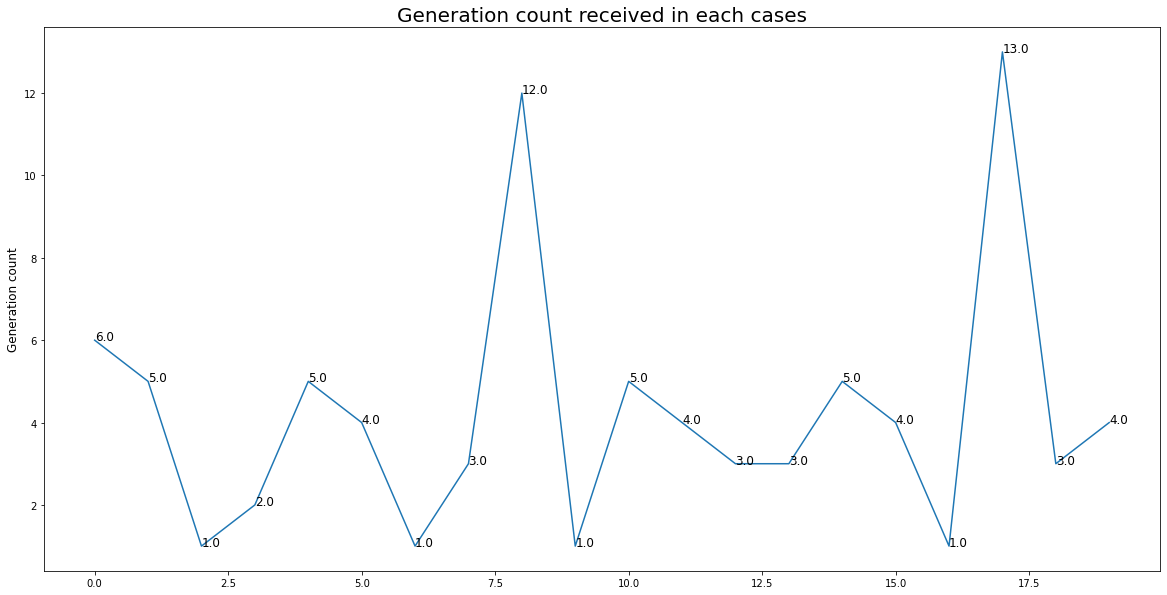

In [ ]:
fig, ax = plt.subplots(figsize=(20,10))
x=np.arange(20)
plt.title("Generation count received in each cases", size=20)
plt.ylabel("Generation count", size=12)
y=generation_count[x]
plt.plot(x, y)
for index in range(len(x)):
      ax.text(x[index], y[index], y[index], size=12)
plt.show()
   

In [ ]:
from prettytable import PrettyTable
myTable = PrettyTable([" ", "Mean", "Median", "Standard Deviation"])
myTable.add_row(["Fitness Count", np.mean(fitness_count), np.median(fitness_count), np.std(fitness_count)])
myTable.add_row(["Generation Count", np.mean(generation_count), np.median(generation_count), np.std(generation_count)])
print(myTable)

+------------------+-------------------+--------+--------------------+
|                  |        Mean       | Median | Standard Deviation |
+------------------+-------------------+--------+--------------------+
|  Fitness Count   | 88.85714285714286 |  82.0  | 55.957709979255306 |
| Generation Count | 4.380952380952381 |  4.0   | 3.1087616655141836 |
+------------------+-------------------+--------+--------------------+
